**Twitter Sentiment Analysis**

Research Questions:
1. How many positive, negative and neutral tweets are in the dataset?
2. How many topics are there?
3. Is the Dataset balanced? 
4. How accurate does logistic regression classify test sentences and how does preprocessing influence accuracy?
5. What flaws and limitations might come with the dataset?

**Importing modules**

In [1]:
#Data Module
import pandas as pd

#ML Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


#Plot Modules
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [2]:
train_data = pd.read_csv("data/twitter_training.csv")


headers =  ["id", "topic", "sentiment" , "content"]

train_data.columns = headers
train_data.head()


,id,topic,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Dropping unwanted columns**

In [3]:
train_data_cleaned = train_data.drop(["id"], axis=1)
train_data_cleaned.sample(5)

,topic,sentiment,content
51659,RedDeadRedemption(RDR),Negative,@RockstarGames Could you please fix the Red De...
11401,Xbox(Xseries),Irrelevant,.. Amazing
67559,johnson&johnson,Neutral,"""Hector Balderas, the attorney general of New ..."
11329,Xbox(Xseries),Negative,Dumbass
6463,Amazon,Neutral,. It's Snow Much Fun! Enter to win a $20 Amazo...


**Plotting sentiment value counts**

<Axes: xlabel='sentiment'>

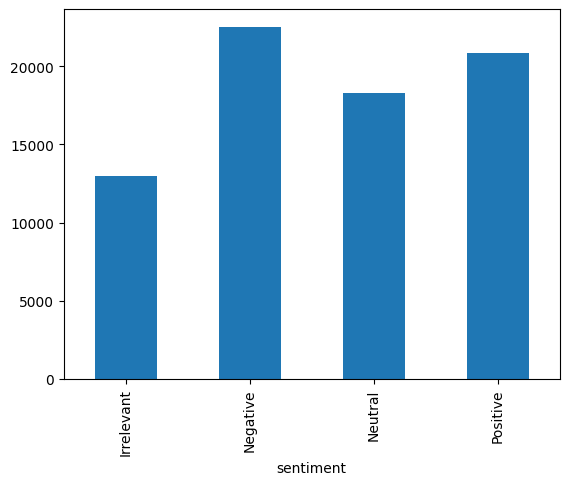

In [4]:
sentiment_count = train_data_cleaned.groupby("sentiment")["sentiment"].count()

sentiment_count.plot(kind="bar")

In [5]:
sentiment_count

sentiment
Irrelevant    12990
Negative      22542
Neutral       18318
Positive      20831
Name: sentiment, dtype: int64

**1. How many positive, negative and neutral sentences are there?**

The dataset has the following amount of tweets:

1. Irrelevant:    12990
2. Negative:      22542
3. Neutral:       18318
4. Positive:      20831

These value are quite balance with a little less neutral than positive and less positive than negative tweets. 
It's interesting that there's actually a fourth value which is title "irrelevant" which makes sense as tweets can be either too short or filled with just emojis for example. 

**Plotting topic counts**

<Axes: xlabel='topic'>

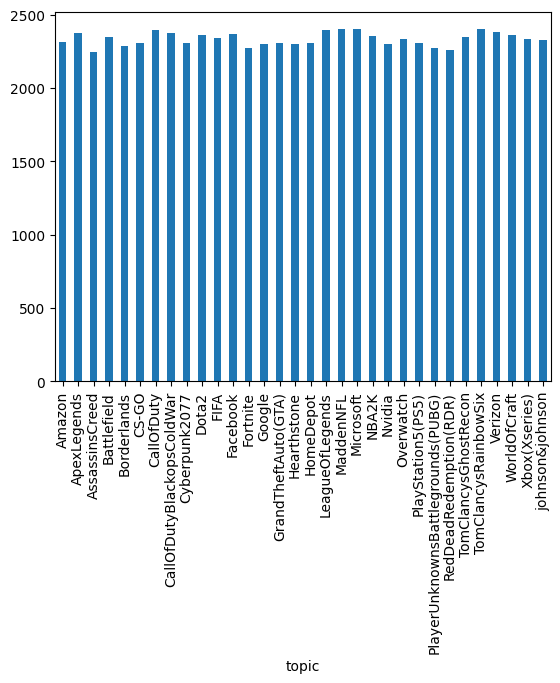

In [6]:
topics = train_data_cleaned.groupby("topic")["topic"].count()
topics.plot(kind="bar")

**2. How many topics are there?**

The Dataset has 32 unqiue topics, which are all quite evenely distributed. The topics are all related to certein videogames or online services

In [7]:
avg = train_data_cleaned.groupby("topic")["content"].count().median()
avg

2316.0

**3. Conclusion on the balance of the dataset**

The dataset is overall balanced. With topics being a bit more balanced than sentiment values with an average 2316 tweets per topic.

**NaN handling**

In [8]:
checknan = train_data.isnull().sum()
checknan

id             0
topic          0
sentiment      0
content      686
dtype: int64

In [9]:
full_train_data = train_data.dropna()

print(train_data.isnull().sum())

id             0
topic          0
sentiment      0
content      686
dtype: int64


In [10]:
full_train_data.head()

,id,topic,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Preprocessing**

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

In [12]:
full_train_data["content_cleaned"] = full_train_data["content"].apply(preprocess_text)

C:\Users\luwa0\AppData\Local\Temp\ipykernel_16972\887238769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_train_data["content_cleaned"] = full_train_data["content"].apply(preprocess_text)


In [13]:
full_train_data.head()

,id,topic,sentiment,content,content_cleaned
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and will kill you all
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and will murder you all
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and can murder you...


**Vectorizing and model fitting**

In [14]:

vectorizer = CountVectorizer(stop_words='english')
label_encoder = LabelEncoder()

x = vectorizer.fit_transform(full_train_data['content_cleaned'])
y = label_encoder.fit_transform(full_train_data['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)


In [15]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

**Accuracy**

In [16]:
y_pred = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8394486113926617
F1 Score:  0.8393573824416611



Scores Before Preprocessing:

1. Accuracy:  0.8431650787215352
2. F1 Score:  0.8431359314739917

Scores after preprocessing with stopword removal:

1. Accuracy:  0.8337725521994729
2. F1 Score:  0.8336838554355276

Scores after preprocessing without stopword removal:

1. Accuracy:  0.8394486113926617
2. F1 Score:  0.8393573824416611

It is interesting to see that the preproccessing acutally slightly lowers the accuracy of the model. In the Dataset description, the authors wrote that the set is actually cleaned well, so this might be a reson why there's only a slight change. As for why exactly the values decrease i am not quite sure what's the real reason behind that and i probably have to ask my teacher on that particular problem.



**Testing out the model**

In [17]:
test_senctence = ["this is bad", "this is good", "i will kill you", "i can't help you",  "this is not good"]

test_vec = vectorizer.transform(test_senctence)
test_pred = model.predict(test_vec)
sentiment = label_encoder.inverse_transform(test_pred)

sentiment

array(['Negative', 'Positive', 'Positive', 'Negative', 'Positive'],
      dtype=object)

**Limitations** 

When testing out the model on our dataset, we can see that there are some flaws to it. For example the sentence "i will kill you" is rated as positive. When we look at the head of the dataframe we can see that there are alot of these kinds of sentences which are rated positive. The thing is that the dataset mainly covers video game topics and most of these tweets were actually meant positively in a game related context. 

Also wenn looking at the text "this is not good" we can see that it is rated positively. Here we can see that the model does not understand negations by itself. 

**Conclusion**

In conclusion i can say that the dataset was overall balanced regarding topics and sentiment values. The LR model managed to come close to a 0.85 accuracy rating on both F1 and Accuracy Score. Preprocessing the text resulted in a slight decrease of accuracy and i am still not exactly sure why that happened. When testing out the model on test sentences i saw that give the video game related topics of the dataset, non video game related sentences might be predicted the wrong way